<a href="https://colab.research.google.com/github/ctarrington/data-science-hw/blob/master/dbda/ch09-heirarchical-models/heirarchical_binomial_baseball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az
from runpy import run_path

az.style.use('arviz-darkgrid')
%matplotlib inline

     |████████████████████████████████| 1.4MB 304kB/s 
     |████████████████████████████████| 4.1MB 2.7MB/s 
     |████████████████████████████████| 286kB 2.6MB/s 
     |████████████████████████████████| 911kB 920kB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


In [2]:
!rm -rf data-science-hw
!git clone https://github.com/ctarrington/data-science-hw.git

base_path = './data-science-hw/dbda/ch09-heirarchical-models'

Cloning into 'data-science-hw'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (227/227), done.
remote: Compressing objects: 100% (200/200), done.
remote: Total 227 (delta 110), reused 57 (delta 17), pack-reused 0
Receiving objects: 100% (227/227), 16.65 MiB | 27.40 MiB/s, done.
Resolving deltas: 100% (110/110), done.


In [5]:
explore_heirarchical_binomial = run_path(base_path+'/heirarchical_binomial.py').get('explore_heirarchical_binomial')

In [4]:
consolidated = pd.read_csv(base_path+'/BattingAverage.csv')
consolidated.rename(columns={'Hits': 'successes', 'AtBats': 'attempts', 'PlayerNumber': 'individual_id', 'PriPosNumber': 'category_id', 'PriPos': 'category', 'Player': 'individual'}, inplace=True)
consolidated.head()


,individual,category,successes,attempts,individual_id,category_id
0,Fernando Abad,Pitcher,1,7,1,1
1,Bobby Abreu,Left Field,53,219,2,7
2,Tony Abreu,2nd Base,18,70,3,4
3,Dustin Ackley,2nd Base,137,607,4,4
4,Matt Adams,1st Base,21,86,5,3


## Heirarchy with Overall

In [6]:
(model, trace, az_data) = explore_heirarchical_binomial(consolidated)

num_individuals 948 num_categories 9


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p_individual, concentration_category, p_category, concentration_overall, p_overall]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [01:02<00:00, 39.70it/s]
The number of effective samples is smaller than 25% for some parameters.


                         mean     sd  hpd_3%  ...  ess_bulk  ess_tail  r_hat
p_overall               0.252  0.034   0.185  ...    5456.0    2934.0    1.0
concentration_overall  19.374  6.500   7.724  ...    5179.0    2471.0    1.0
p_category[0]           0.131  0.007   0.118  ...    1171.0    1983.0    1.0
p_category[1]           0.239  0.008   0.224  ...    3098.0    2660.0    1.0
p_category[2]           0.252  0.008   0.237  ...    4717.0    3048.0    1.0
...                       ...    ...     ...  ...       ...       ...    ...
p_individual[943]       0.144  0.056   0.047  ...    5188.0    2808.0    1.0
p_individual[944]       0.280  0.018   0.244  ...    5985.0    2455.0    1.0
p_individual[945]       0.169  0.040   0.098  ...    6305.0    2509.0    1.0
p_individual[946]       0.097  0.033   0.036  ...    6361.0    2020.0    1.0
p_individual[947]       0.269  0.018   0.236  ...    6673.0    2808.0    1.0

[968 rows x 11 columns]
['Pitcher' 'Catcher' '1st Base' '2nd Base' '3rd Bas

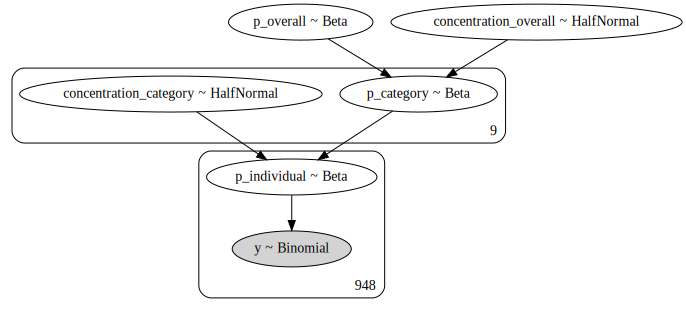

In [7]:
pm.model_to_graphviz(model)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a2b401668>],
      dtype=object)

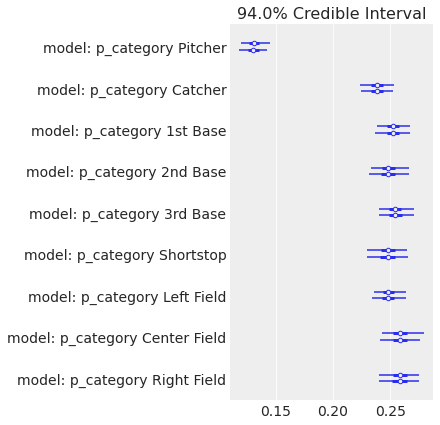

In [8]:
az.plot_forest(az_data, model_names=['model'], var_names='p_category')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a259cf6d8>,
      dtype=object)

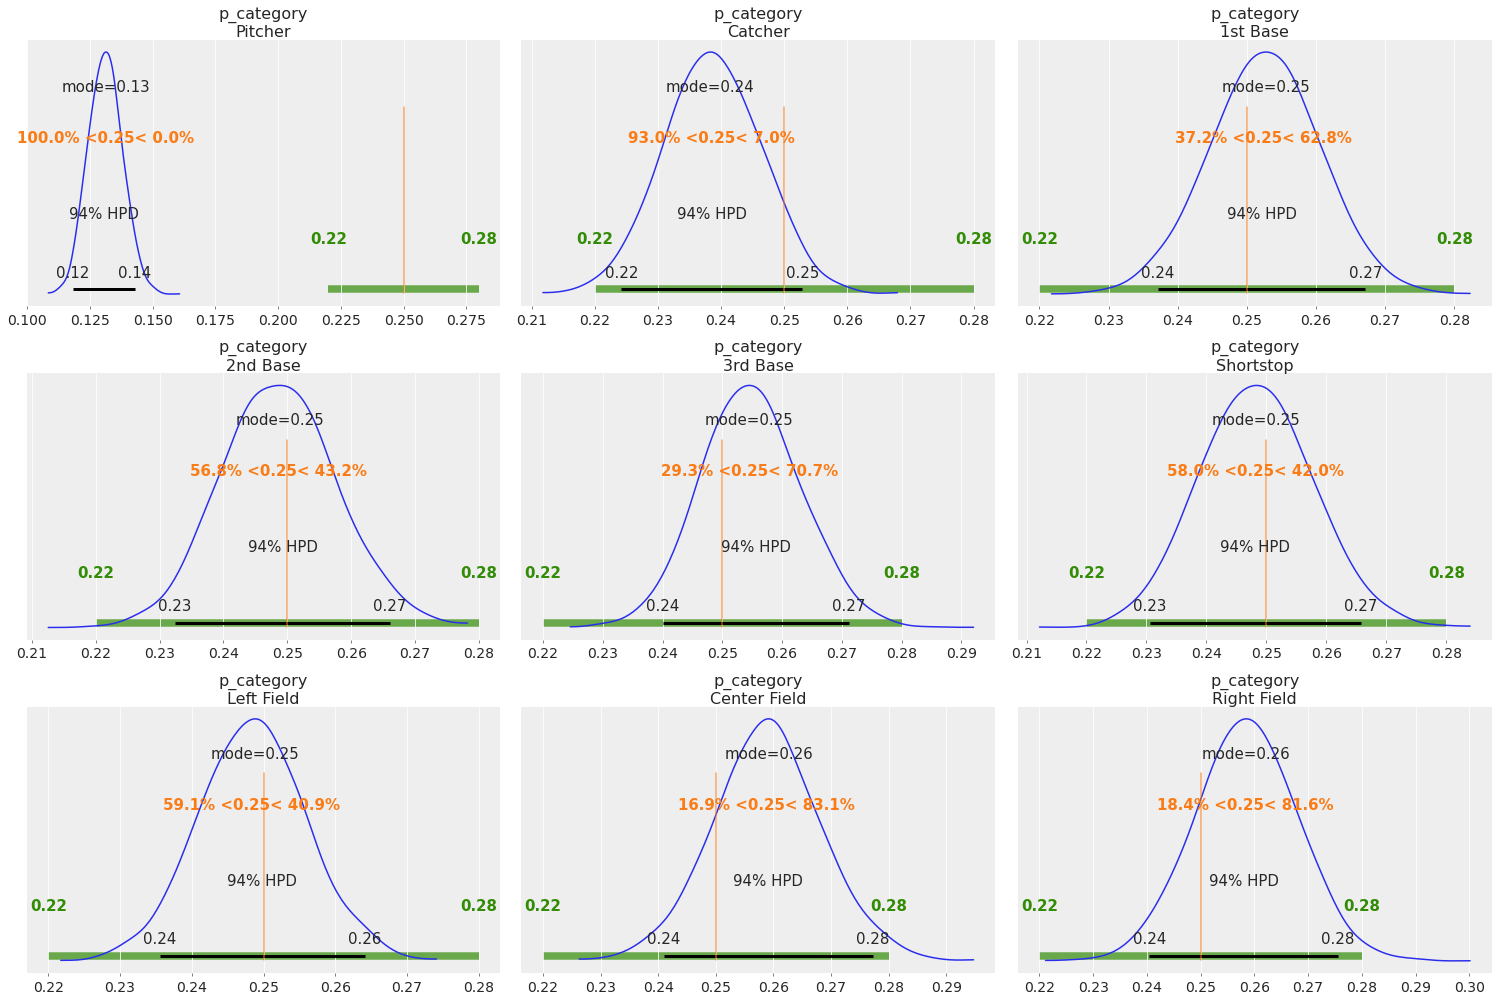

In [10]:
mid_point = trace['p_overall'].mean()
mid_point = round(mid_point, 2)
left_point = round(mid_point-mid_point*0.1, 2)
right_point = round(mid_point+mid_point*0.1, 2)

az.plot_posterior(az_data, rope=[left_point, right_point], ref_val=mid_point, point_estimate='mode', var_names='p_category')